# Title

Short description of what this notebook is about

## Preliminaries

In [1]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

Import commonly used libraries and magic command for inline plotting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
%matplotlib inline

## Work

This is where work gets done.

Read data to pandas dataframes


In [4]:
tax_df = pd.read_csv("./data/raw/Taxinfo.csv")

In [5]:
tax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   HHI             1004 non-null   int64 
 1   HHDL            1004 non-null   int64 
 2   Married         1004 non-null   int64 
 3   CollegGrads     1004 non-null   int64 
 4   AHHAge          1004 non-null   int64 
 5   Cars            1004 non-null   int64 
 6   Filed_2017      1004 non-null   int64 
 7   Filed_2016      1004 non-null   int64 
 8   Filed_2015      1004 non-null   int64 
 9   PoliticalParty  1004 non-null   object
dtypes: int64(9), object(1)
memory usage: 78.6+ KB


In [6]:
tax_df.iloc[:5,:10]

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed_2017,Filed_2016,Filed_2015,PoliticalParty
0,49685,227187,0,0,105,0,1,1,1,Democrat
1,64756,-507342,2,3,68,3,1,0,0,Independent
2,115435,521290,1,3,81,2,0,1,0,Republican
3,99454,251829,2,1,52,4,1,0,0,Republican
4,157274,-472337,0,1,28,1,1,0,1,Independent


In [7]:
tax_df.iloc[:5,3:10]

,CollegGrads,AHHAge,Cars,Filed_2017,Filed_2016,Filed_2015,PoliticalParty
0,0,105,0,1,1,1,Democrat
1,3,68,3,1,0,0,Independent
2,3,81,2,0,1,0,Republican
3,1,52,4,1,0,0,Republican
4,1,28,1,1,0,1,Independent


In [8]:
tax_df.iloc[:,9]

0          Democrat
1       Independent
2        Republican
3        Republican
4       Independent
           ...     
999        Democrat
1000     Republican
1001     Republican
1002     Republican
1003     Republican
Name: PoliticalParty, Length: 1004, dtype: object

In [9]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


Importing sweetviz


In [10]:
import sweetviz as sv

Analyzing dataset


In [11]:
tax_report = sv.analyze(tax_df)

Display the report


In [12]:
tax_report.show_html("output/sweetviz_report.html")

Report output/sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Basic Report 

In [13]:
tax_df.groupby(['PoliticalParty']).size()

PoliticalParty
Democrat       336
Independent    337
Republican     331
dtype: int64

Basic Report by percentage

In [14]:
tax_df['PoliticalParty'].value_counts(normalize=True)

Independent    0.335657
Democrat       0.334661
Republican     0.329681
Name: PoliticalParty, dtype: float64

Exploring the data type

In [15]:
tax_df.select_dtypes(include=np.number).columns.tolist()

['HHI',
 'HHDL',
 'Married',
 'CollegGrads',
 'AHHAge',
 'Cars',
 'Filed_2017',
 'Filed_2016',
 'Filed_2015']

Married, Filed_2017, Filed_2016, and Filed_2015 are categorial. Let's convert their data type

In [16]:
tax_df["Married"] = tax_df["Married"].astype("category")
tax_df["Filed_2016"] = tax_df["Filed_2016"].astype("category")
tax_df["Filed_2015"] = tax_df["Filed_2015"].astype("category")
tax_df["Filed_2017"] = tax_df["Filed_2017"].astype("category")
tax_df["PoliticalParty"] = tax_df["PoliticalParty"].astype("category")

In [17]:
tax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   HHI             1004 non-null   int64   
 1   HHDL            1004 non-null   int64   
 2   Married         1004 non-null   category
 3   CollegGrads     1004 non-null   int64   
 4   AHHAge          1004 non-null   int64   
 5   Cars            1004 non-null   int64   
 6   Filed_2017      1004 non-null   category
 7   Filed_2016      1004 non-null   category
 8   Filed_2015      1004 non-null   category
 9   PoliticalParty  1004 non-null   category
dtypes: category(5), int64(5)
memory usage: 44.7 KB


Create Cross tab for PoliticalParty by Marital status

In [18]:
status_by_MaritalStatus = pd.crosstab(tax_df['Married'], tax_df['PoliticalParty'])
status_by_MaritalStatus


PoliticalParty,Democrat,Independent,Republican
Married,,,
0,121,119,102
1,111,111,128
2,104,107,101


Create plot for PoliticalParty by Marital status

<AxesSubplot:xlabel='Married'>

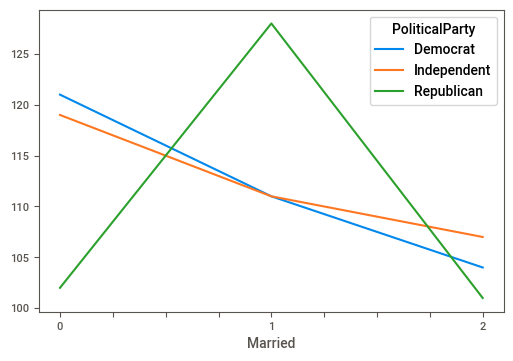

In [19]:
status_by_MaritalStatus.plot(kind ='line')

Create plot for PoliticalParty by College graduate

In [20]:
status_by_CollegeGrad = pd.crosstab(tax_df['CollegGrads'], tax_df['PoliticalParty'])
status_by_CollegeGrad

PoliticalParty,Democrat,Independent,Republican
CollegGrads,,,
0,55,46,45
1,49,62,52
2,49,57,68
3,60,54,49
4,58,62,64
5,65,56,53


Create Plot by College Grads

<AxesSubplot:xlabel='CollegGrads'>

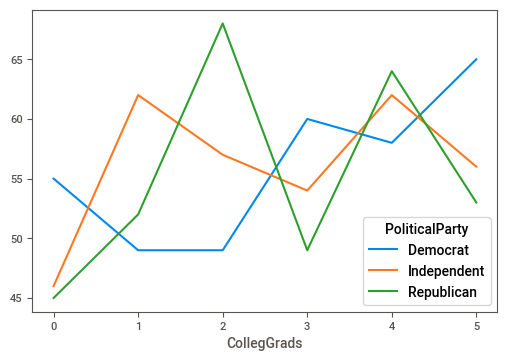

In [21]:
status_by_CollegeGrad.plot(kind ='line')

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import plot_confusion_matrix

Create categorial and numerical columns

In [23]:
categorical_cols= tax_df.select_dtypes(include=['category']).columns.tolist()
numeric_cols= tax_df.select_dtypes(include=['number']).columns.tolist()
all_cols = tax_df.columns.tolist()


In [24]:
categorical_cols

['Married', 'Filed_2017', 'Filed_2016', 'Filed_2015', 'PoliticalParty']

In [25]:
numeric_cols

['HHI', 'HHDL', 'CollegGrads', 'AHHAge', 'Cars']

In [26]:
all_cols

['HHI',
 'HHDL',
 'Married',
 'CollegGrads',
 'AHHAge',
 'Cars',
 'Filed_2017',
 'Filed_2016',
 'Filed_2015',
 'PoliticalParty']

In [27]:
assert len(all_cols) == len(categorical_cols) + len(numeric_cols), 'error'

Create column index for categorical columns

In [28]:
categorical_cols_idx = [tax_df.columns.get_loc(c) for c in categorical_cols]
categorical_cols_idx

[2, 6, 7, 8, 9]

In [29]:
numeric_cols_idx = [tax_df.columns.get_loc(c) for c in numeric_cols]
numeric_cols_idx

[0, 1, 3, 4, 5]

In [30]:
tax_df.iloc[:, categorical_cols_idx].nunique()

Married           3
Filed_2017        2
Filed_2016        2
Filed_2015        2
PoliticalParty    3
dtype: int64

Create transformer object for numeric variables by using StandardScaler

In [87]:
#sc = StandardScaler()

In [88]:
#numeric_transformer = sc.fit_transform(tax_df[['HHI','HHDL', 'CollegGrads','AHHAge', 'Cars']])

Create transformer object for categorial variables by using OneHotEncoder

In [89]:
#oe = OneHotEncoder(handle_unknown = 'ignore')

In [90]:
#categorical_transformer = oe.fit_transform(tax_df[['Married','Filed_2017','Filed_2016','Filed_2015','PoliticalParty']])

Combine numeric and categorical transformers together and create preprocessing object by Column transformer

In [91]:
#preprocessor = ColumnTransformer(
#transformers =[
   # ('nums', numeric_transformer, numeric_cols),
   # ('cat', categorical_transformer, categorical_cols)])

Create classifier model

In [92]:
clf_model = LogisticRegression(penalty = 'l2', C = 1, solver = 'saga', max_iter =500)

Create pipeline clf

In [93]:
#clf = Pipeline(steps=[('preprocessor', preprocessor),
                    #('classifier', clf_model)])

In [94]:
#set_config(display ='diagram')
#clf

Partition data into train and test data for model fitting and model testing

In [95]:
X = tax_df.iloc[:, 0:9].values
y = tax_df.iloc[:, 9].values

print(X.shape)

(1004, 9)


In [96]:
print(y.shape)

(1004,)


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [98]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 9)
(201, 9)
(803,)
(201,)


Transforming data data

In [99]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Fit 1st model  on training data and compute score

In [100]:
clf_model.fit(X_train, y_train)
print("Training score: %.3f" % clf_model.score(X_train, y_train))
print("Test score: %.3f" % clf_model.score(X_test, y_test))

Training score: 0.390
Test score: 0.279


Confusion matrix for model 1 on train data

Confusion matrix for train, without normalization
[[110  86  71]
 [ 83 108  75]
 [ 85  90  95]]


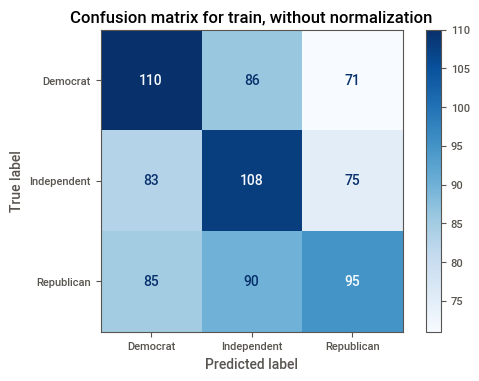

Normalized confusion matrix for train
[[0.41198502 0.32209738 0.2659176 ]
 [0.31203008 0.40601504 0.28195489]
 [0.31481481 0.33333333 0.35185185]]


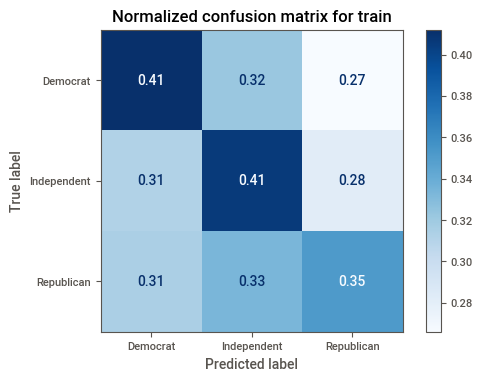

In [101]:
titles_options = [("Confusion matrix for train, without normalization", None),
                ("Normalized confusion matrix for train", 'true')]
class_names = clf_model.classes_
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_model, X_train, y_train,
                                display_labels=class_names,
                                cmap=plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    plt.show()

Confusion matrix for model 1 for test data

Confusion matrix for train, without normalization
[[16 30 23]
 [28 26 17]
 [22 25 14]]


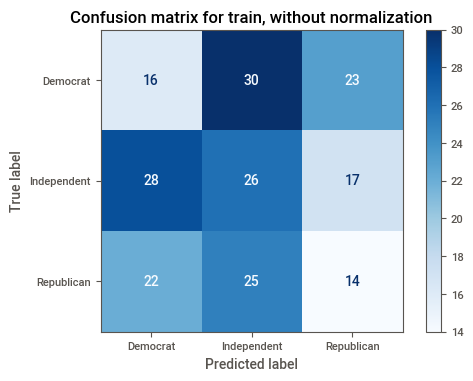

Normalized confusion matrix for train
[[0.23188406 0.43478261 0.33333333]
 [0.3943662  0.36619718 0.23943662]
 [0.36065574 0.40983607 0.2295082 ]]


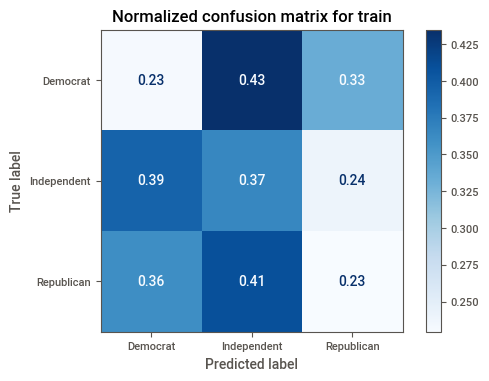

In [102]:
titles_options = [("Confusion matrix for train, without normalization", None),
                ("Normalized confusion matrix for train", 'true')]
class_names = clf_model.classes_
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_model, X_test, y_test,
                                display_labels=class_names,
                                cmap=plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    plt.show()

Summary for Model1: 

Fit 2nd model  on training data

In [103]:
clf_model_l1 = LogisticRegression(penalty = 'l1', C = 0.001, solver = 'saga', max_iter =500)

In [104]:
#clf_LR_Model2 = Pipeline(steps=[('preprocessor', preprocessor),
                    # ('classifier', clf_model_l1)])
    

In [105]:
clf_model_l1.fit(X_train, y_train)
print("Training score: %.3f" % clf_model_l1.score(X_train, y_train))
print("Test score: %.3f" % clf_model_l1.score(X_test, y_test))

Training score: 0.336
Test score: 0.303


Confusion Matrix for model 2 on training data

Confusion matrix for train, without normalization
[[  0   0 267]
 [  0   0 266]
 [  0   0 270]]


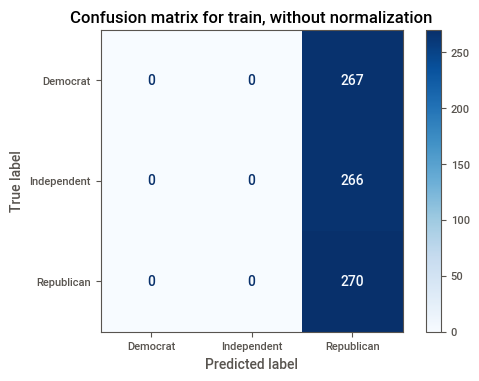

Normalized confusion matrix for train
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


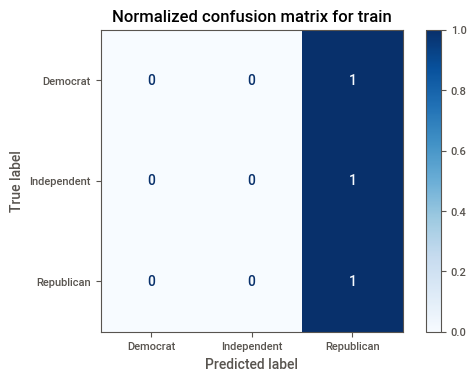

In [106]:
titles_options = [("Confusion matrix for train, without normalization", None),
                ("Normalized confusion matrix for train", 'true')]
class_names = clf_model_l1.classes_
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_model_l1, X_train, y_train,
                                display_labels=class_names,
                                cmap=plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    plt.show()

Confusion Matrix on model 2 on test data

Confusion matrix for train, without normalization
[[ 0  0 69]
 [ 0  0 71]
 [ 0  0 61]]


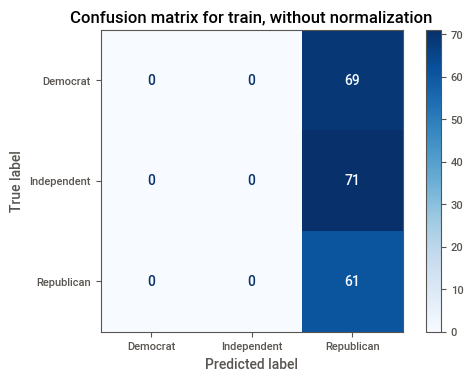

Normalized confusion matrix for train
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


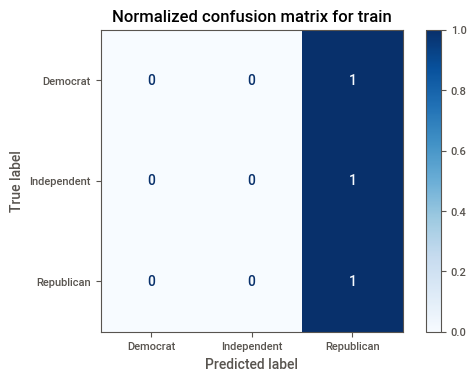

In [107]:
titles_options = [("Confusion matrix for train, without normalization", None),
                ("Normalized confusion matrix for train", 'true')]
class_names = clf_model_l1.classes_
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_model_l1, X_test, y_test,
                                display_labels=class_names,
                                cmap=plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    plt.show()

Fit Final model  on training data

In [108]:
clf_model_Final = LogisticRegression(penalty = 'l2', C = 10, solver = 'saga', max_iter =500)

In [109]:
#clf_LR_Final = Pipeline(steps=[('preprocessor', preprocessor),
                     #('classifier', clf_model_Final)])

In [110]:
clf_model_Final.fit(X_train, y_train)
print("Training score: %.3f" % clf_model_Final.score(X_train, y_train))
print("Test score: %.3f" % clf_model_Final.score(X_test, y_test))

Training score: 0.389
Test score: 0.279


Confusion Matrix for final model on training data

Confusion matrix for train, without normalization
[[110  86  71]
 [ 83 108  75]
 [ 85  91  94]]


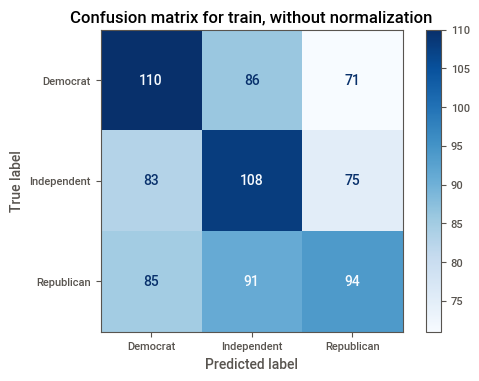

Normalized confusion matrix for train
[[0.41198502 0.32209738 0.2659176 ]
 [0.31203008 0.40601504 0.28195489]
 [0.31481481 0.33703704 0.34814815]]


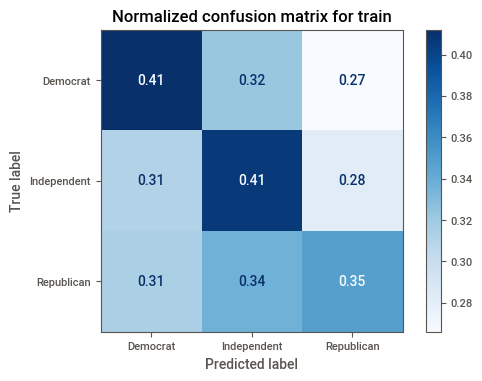

In [111]:
titles_options = [("Confusion matrix for train, without normalization", None),
                ("Normalized confusion matrix for train", 'true')]
class_names = clf_model_Final.classes_
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_model_Final, X_train, y_train,
                                display_labels=class_names,
                                cmap=plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    plt.show()

Confusion Matrix for final model on test data

Confusion matrix for train, without normalization
[[16 30 23]
 [28 26 17]
 [22 25 14]]


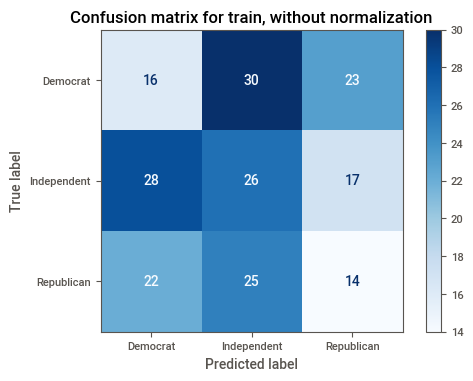

Normalized confusion matrix for train
[[0.23188406 0.43478261 0.33333333]
 [0.3943662  0.36619718 0.23943662]
 [0.36065574 0.40983607 0.2295082 ]]


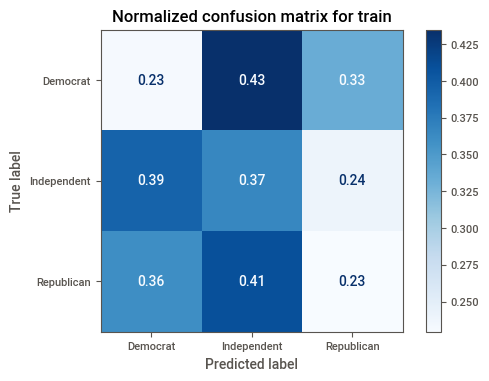

In [112]:
titles_options = [("Confusion matrix for train, without normalization", None),
                ("Normalized confusion matrix for train", 'true')]
class_names = clf_model_Final.classes_
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_model_Final, X_test, y_test,
                                display_labels=class_names,
                                cmap=plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    plt.show()

Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
#numeric_transformer = StandardScaler()

#categorical_transformer = OneHotEncoder(handle_unknown = 'ignore')

#preprocessor = ColumnTransformer(
#transformers =[
    #('nums', numeric_transformer, numeric_cols),
    #('cat', categorical_transformer, categorical_cols)])

In [59]:
#clf_rf = Pipeline(steps=[('preprocessor', preprocessor),
                     #('classifier', RandomForestClassifier(oob_score=True, random_state =0))])

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [61]:
clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
clf_rf.fit(X_train, y_train)
print("Training score: %.3f" % clf_rf.score(X_train, y_train))
print("Test score: %.3f" % clf_rf.score(X_test, y_test))

Training score: 0.460
Test score: 0.433


Confusion Matrix for train data for random forest

Confusion matrix for train, without normalization
[[ 99  66 100]
 [ 70 135  67]
 [ 65  66 135]]


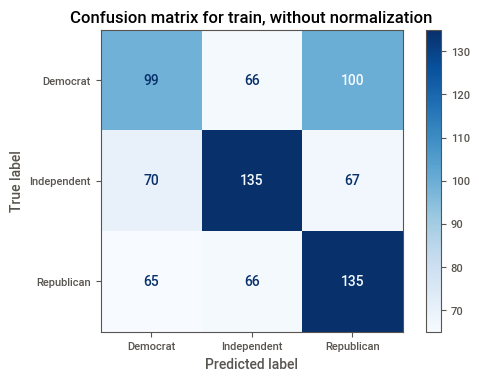

Normalized confusion matrix for train
[[0.37358491 0.2490566  0.37735849]
 [0.25735294 0.49632353 0.24632353]
 [0.2443609  0.2481203  0.5075188 ]]


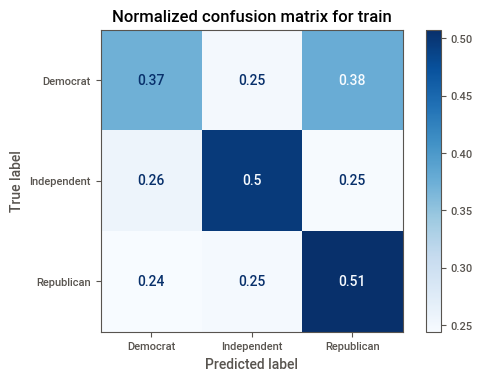

In [62]:
titles_options = [("Confusion matrix for train, without normalization", None),
                ("Normalized confusion matrix for train", 'true')]
class_names = clf_rf.classes_
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_rf, X_train, y_train,
                                display_labels=class_names,
                                cmap=plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    plt.show()

Confusion matrix for test data for random forest

Confusion matrix for test, without normalization
[[22 20 29]
 [16 33 16]
 [16 17 32]]


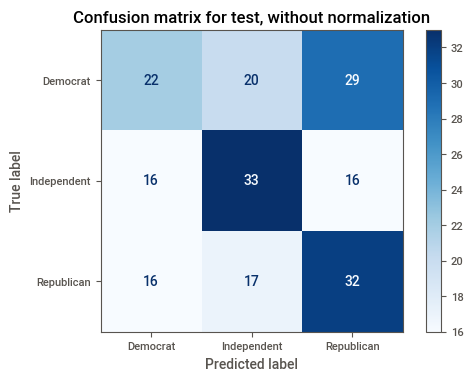

Normalized confusion matrix for test
[[0.30985915 0.28169014 0.4084507 ]
 [0.24615385 0.50769231 0.24615385]
 [0.24615385 0.26153846 0.49230769]]


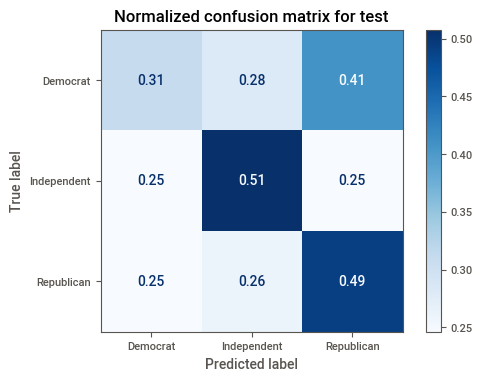

In [63]:
titles_options = [("Confusion matrix for test, without normalization", None),
                ("Normalized confusion matrix for test", 'true')]
class_names = clf_rf.classes_
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_rf, X_test, y_test,
                                display_labels=class_names,
                                cmap=plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)
    plt.show()